### End to End ML Toy Project

### Performing classification problem , predicting placement hoga ya ni

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('placement (2).csv')

In [54]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [56]:
df = df.iloc[:,1:] # data mai se sare rows chaiye but column 1 onwards chaiye

In [57]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [58]:
df.shape

(100, 3)

In [59]:
# steps
# 1. Preprocess + EDA + Feature Selection
# 2. Extract input and output columns
# 3. Scale the values
# 4. Train Test Split
# 5. Train the model/cross validation
# 6. Evaluate the model/model selection
# 7. Deploy the model

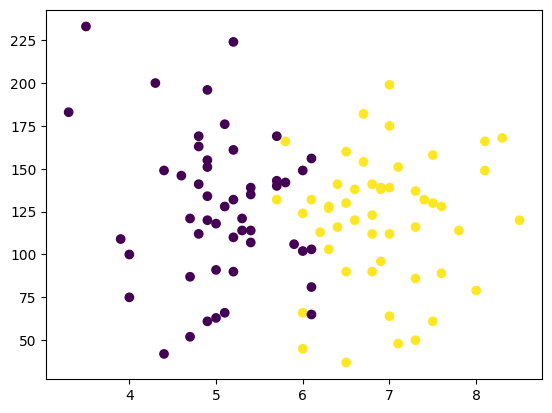

In [60]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [61]:
# iq and cgpa are independent columns and palacment is a dependent column 
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [62]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [63]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [64]:
y.shape

(100,)

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1) # 0.1 means 10% data testing mai jayega and 90% training mai 


In [66]:
x_train

,cgpa,iq
54,6.4,141.0
5,7.1,48.0
49,5.4,135.0
94,4.7,52.0
84,5.7,169.0
...,...,...
45,6.0,66.0
34,4.8,163.0
65,8.1,166.0
12,5.4,139.0


In [67]:
y_train

54    1
5     1
49    0
94    0
84    0
     ..
45    1
34    0
65    1
12    0
74    1
Name: placement, Length: 90, dtype: int64

In [68]:
x_test

,cgpa,iq
56,6.1,65.0
81,5.4,107.0
41,5.4,114.0
53,8.3,168.0
3,7.4,132.0
9,5.1,66.0
30,7.6,128.0
19,5.2,132.0
76,4.9,155.0
50,3.5,233.0


In [69]:
y_test

56    0
81    0
41    0
53    1
3     1
9     0
30    1
19    0
76    0
50    0
Name: placement, dtype: int64

In [72]:
# scale process
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()

In [74]:
x_train = scaler.fit_transform(x_train)

In [75]:
x_train

array([[ 3.59738863e-01,  4.66983929e-01],
       [ 9.92798874e-01, -1.92802556e+00],
       [-5.44632581e-01,  3.12467188e-01],
       [-1.17769259e+00, -1.82501440e+00],
       [-2.73321148e-01,  1.18806206e+00],
       [ 7.21487441e-01, -8.46408372e-01],
       [-1.26812974e+00,  5.95747880e-01],
       [ 1.17367316e+00, -1.76835826e-01],
       [-1.90118975e+00, -3.57105358e-01],
       [-9.96818303e-01,  7.24511831e-01],
       [ 7.21487441e-01,  4.66983929e-01],
       [-9.96818303e-01, -1.59323929e+00],
       [ 8.84274301e-02, -5.11622099e-01],
       [ 1.35454745e+00,  9.04781363e-01],
       [ 5.40613152e-01,  3.89725559e-01],
       [-1.08725545e+00,  1.18806206e+00],
       [-2.73321148e-01,  4.41231139e-01],
       [ 9.02361730e-01, -1.51598092e+00],
       [ 9.92798874e-01,  7.24511831e-01],
       [ 9.02361730e-01,  1.34257880e+00],
       [ 3.59738863e-01, -1.76835826e-01],
       [-9.24468587e-02, -4.34363728e-01],
       [-1.81075260e+00, -1.23270023e+00],
       [ 4.

In [76]:
x_test = scaler.transform(x_test)

In [77]:
x_test

array([[ 0.08842743, -1.49022813],
       [-0.54463258, -0.40861094],
       [-0.54463258, -0.22834141],
       [ 2.07804461,  1.16230927],
       [ 1.26411031,  0.23520882],
       [-0.81594401, -1.46447534],
       [ 1.4449846 ,  0.13219766],
       [-0.72550687,  0.23520882],
       [-0.9968183 ,  0.82752299],
       [-2.26293832,  2.83624063]])

In [81]:
# model training
from sklearn.linear_model import LogisticRegression

In [82]:
clf = LogisticRegression()

In [83]:
clf.fit(x_train,y_train)

LogisticRegression()

In [86]:
# model evaluate
y_pred = clf.predict(x_test)

In [85]:
y_test

56    0
81    0
41    0
53    1
3     1
9     0
30    1
19    0
76    0
50    0
Name: placement, dtype: int64

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
accuracy_score(y_test,y_pred)

0.9

In [90]:
%pip install mlxtend
from mlxtend.plotting import plot_decision_regions

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 1.9 MB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.4 MB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 2.4 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


<Axes: >

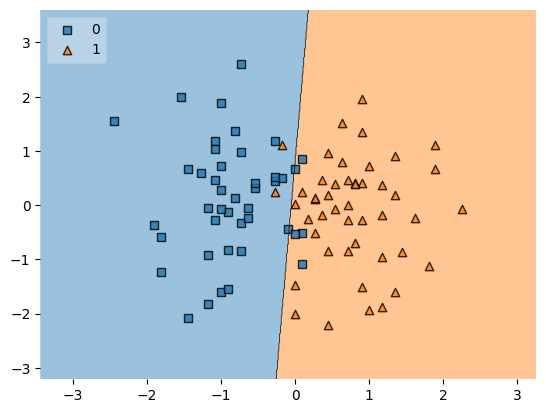

In [91]:
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)

In [92]:
import pickle # kese bhe object ko file mai convert kar deta hai and us file ko kese  bhe enviroment mai use kar sakte ho


In [93]:
pickle.dump(clf,open('model.pkl','wb'))